# Introduction
The difference between a good and an average machine learning model is often its ability to clean data. One of the biggest challenges in data cleaning is the identification and treatment of outliers. In simple terms, outliers are observations that are significantly different from other data points. Even the best machine learning algorithms will underperform if outliers are not cleaned from the data because outliers can adversely affect the training process of a machine learning algorithm, resulting in a loss of accuracy.

Lets use a bank data, which is used by Market team, who are working on a campaign so that they can call the potential customers which can buy the term loans.
- age ---> outliers 
- balance --> outlier
- duration ---> outliers 
- campaign ----> outliers

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_excel('train.xlsx')
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [13]:
df = data.copy()

In [14]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# Outlier Identification
There can be many reasons for the presence of outliers in the data. Sometimes the outliers may be genuine, while in other cases, they could exist because of data entry errors. It is important to understand the reasons for the outliers before cleaning them.

We will start the process of finding outliers by running the summary statistics on the variables. This is done using the describe() function below, which provides a statistical summary of all the quantitative variables.

In [15]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Identifying Outliers with Visualization

In [16]:
def plotvariable(data, var):
    plt.figure(figsize=(16,4))
    #histogram
    plt.subplot(1,2,1)
    plt.hist(df[var], alpha=0.5)

    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[var])
    plt.show()

C:\Users\AALOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


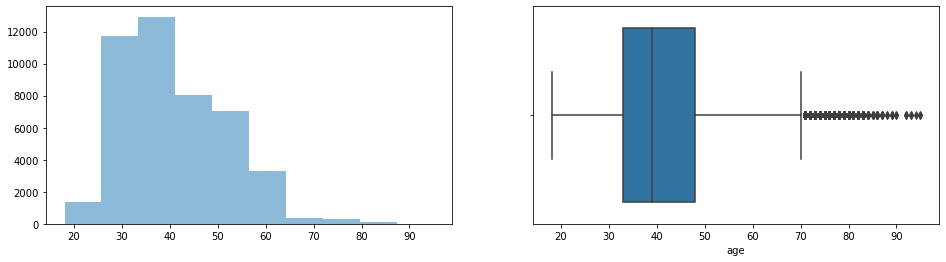

In [17]:
plotvariable(df, 'age')

# Identifying Outliers with Interquartile Range (IQR)
The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the datas

In [18]:
q1_age = df['age'].quantile(0.25)
q3_age = df['age'].quantile(0.75)

IQR_age =  q3_age - q1_age 
IQR_age

upper_bound_age = q1_age + 1.5 * IQR_age
lower_bound_age = q3_age - 1.5 * IQR_age

In [24]:
#capping
df.loc[(df['age'] < lower_bound_age, 'age')] = lower_bound_age
df.loc[(df['age'] > upper_bound_age, 'age')] = upper_bound_age

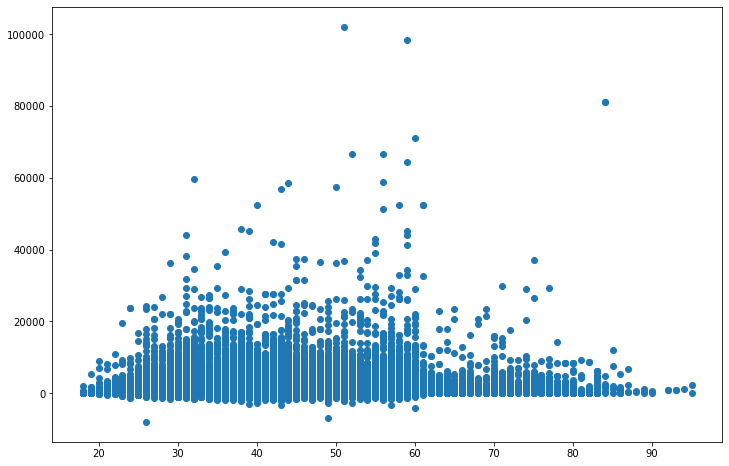

In [19]:
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(df['age'], df['balance'])
plt.show()

In [20]:
Q1_bal = df['balance'].quantile(0.25)
Q3_bal = df['balance'].quantile(0.75)
print('Q1',Q1_bal)
print('Q3',Q3_bal)

IQR_bal = Q3_bal - Q1_bal
print('Inter Quartile Range =',IQR_bal) 

lower_bound_bal = Q1_bal - 1.5 * IQR_bal
upper_bound_bal = Q3_bal + 1.5 * IQR_bal
df['balance'] = np.where(data['balance'] > upper_bound_bal, upper_bound_bal,
                np.where(data['balance'] < lower_bound_bal, lower_bound_bal, df['balance']))

print((df['balance'] < lower_bound_bal, 'balance'))
print((df['balance'] > upper_bound_bal, 'balance'))

Q1 72.0
Q3 1428.0
Inter Quartile Range = 1356.0
(0        False
1        False
2         True
3        False
4         True
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Name: balance, Length: 45211, dtype: bool, 'balance')
(0         True
1        False
2        False
3         True
4        False
         ...  
45206     True
45207     True
45208     True
45209     True
45210     True
Name: balance, Length: 45211, dtype: bool, 'balance')


In [21]:
#Generalised function, just pass the column names

def Remove_Outlier_IQR(data, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    df.loc[(df[col].values < (Q1 - 1.5*IQR), col)] = Q1 - 1.5*IQR
    df.loc[(df[col].values > (Q3 + 1.5*IQR), col)] = Q3 + 1.5*IQR
    return df

In [22]:
df_bank = Remove_Outlier_IQR(df, 'duration')

C:\Users\AALOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


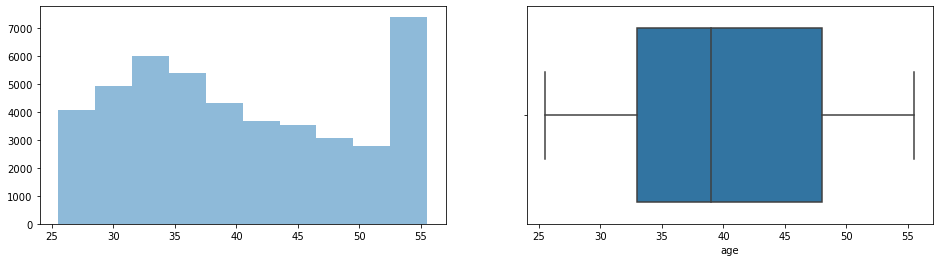

In [25]:
plotvariable(df, 'age')